In [ ]:
#IMPORT STATEMENTS:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#MOUNTING GOOGLE DRIVE FOR FILES ACCESS:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Analysis data/raw_tweets_queens_death.xlsx')

In [ ]:
df.isna().sum()

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                   70
place              601783
tweet                   1
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet            602359
quote_url          553837
video                   0
thumbnail          397772
near               602359
geo                602359
source             602359
user_rt_id         602359
user_rt            602359
retweet_id         602359
reply_to                0
retweet_date       602359
translate          602359
trans_src          602359
trans_dest         602359
dtype: int64

In [ ]:
n = len(pd.unique(df['user_id']))
n

484017

In [ ]:
df.shape

(602359, 36)

In [ ]:
df['retweets_count'].max()

52542

In [ ]:
user_with_most_retweet=df.loc[df['retweets_count'] == df['retweets_count'].max()]
user_with_most_retweet[['user_id','username','retweets_count']]

,user_id,username,retweets_count
418318,1276736395390749952,ycsm1n,52542


In [ ]:
#Defining a score for most effective tweet
#likes= 1 point
#replies = 3 point
#retweet = 5 point
#time from death = 2 point

df['score']=df['replies_count']*3+df['retweets_count']*5+df['likes_count']*1
most_effective_tweets=df.nlargest(10,'score')
user_with_most_effective_tweet=df.loc[df['score'] == df['score'].max()]
user_with_most_effective_tweet[['user_id','username','time','likes_count','replies_count','retweets_count','score']]


,user_id,username,time,likes_count,replies_count,retweets_count,score
418318,1276736395390749952,ycsm1n,18:19:31,337168,920,52542,602638


Text(0.5, 1.0, 'Different Languages')

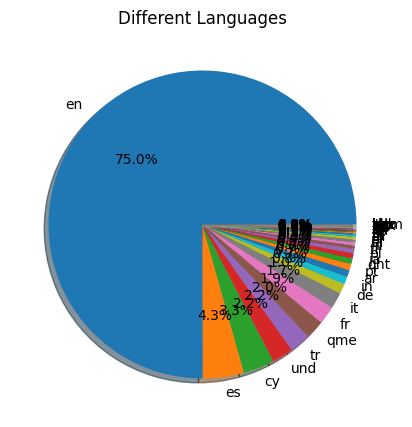

In [ ]:
#Language distribution
plt.figure(figsize=(5,5))
plt.pie(df['language'].value_counts(), labels=df['language'].value_counts().index, autopct="%1.1f%%", shadow=True)
plt.title("Different Languages")

This plot shows that most of the tweets are in english and only 25%(approx) is in other languages

In [ ]:
language_counts = df['language'].value_counts()
top_5_languages = language_counts.head(5)
other_languages_count = language_counts[5:].sum()
top_languages = top_5_languages.append(pd.Series({'Others': other_languages_count}))
plt.figure(figsize=(12, 6))
top_languages.plot(kind='bar')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Language Distribution (Top 10 Languages)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Location distribution
df_loc=pd.read_excel('/content/drive/MyDrive/Analysis data/Coordinates.xlsx')
df_loc.isna().sum()

A              0
B              0
C              0
D              0
Coordinates    0
E              0
Latitude       0
Longitude      0
dtype: int64

In [ ]:
#!pip install geopy
#from geopy.geocoders import Nominatim
#locname=Nominatim(user_agent="GetLoc").reverse(coordinates)
#print(locname.address)
#address = location.raw['address']

# Traverse the data
#city = address.get('city', '')
#state = address.get('state', '')
#country = address.get('country', '')

In [ ]:
from shapely.geometry import Point
import geopandas
from geopandas import GeoDataFrame
gdf = geopandas.GeoDataFrame(df_loc, geometry=geopandas.points_from_xy(df_loc.Longitude, df_loc.Latitude), crs="EPSG:4326")
gdf.head(5)

,A,B,C,D,Coordinates,E,Latitude,Longitude,geometry
0,1,"{'type': 'Point', 'coordinates': [32.7949, -11...","{'type': 'Point', 'coordinates':","32.7949, -116.954]}","32.7949, -116.954",},32.794900,-116.954000,POINT (-116.95400 32.79490)
1,2,"{'type': 'Point', 'coordinates': [32.7774, -96...","{'type': 'Point', 'coordinates':","32.7774, -96.7977]}","32.7774, -96.7977",},32.777400,-96.797700,POINT (-96.79770 32.77740)
2,3,"{'type': 'Point', 'coordinates': [45.5038, -73...","{'type': 'Point', 'coordinates':","45.5038, -73.5744]}","45.5038, -73.5744",},45.503800,-73.574400,POINT (-73.57440 45.50380)
3,4,"{'type': 'Point', 'coordinates': [38.3538, -12...","{'type': 'Point', 'coordinates':","38.3538, -121.973]}","38.3538, -121.973",},38.353800,-121.973000,POINT (-121.97300 38.35380)
4,5,"{'type': 'Point', 'coordinates': [57.14563414,...","{'type': 'Point', 'coordinates':","57.14563414, -2.11172404]}","57.14563414, -2.11172404",},57.145634,-2.111724,POINT (-2.11172 57.14563)


<ipython-input-16-164196f87795>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


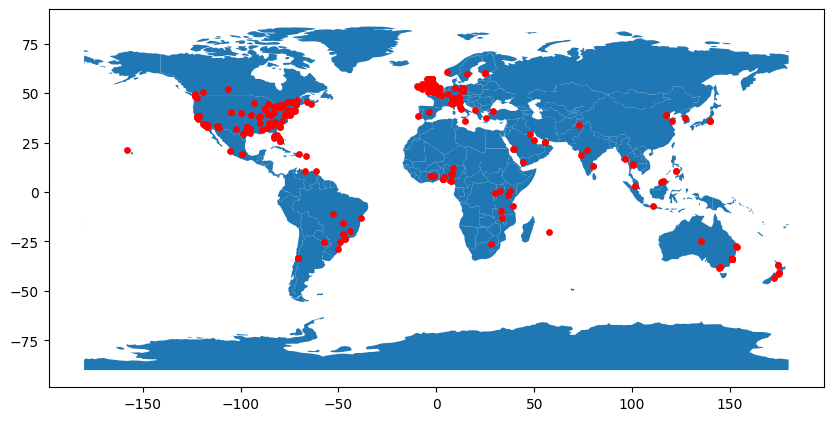

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

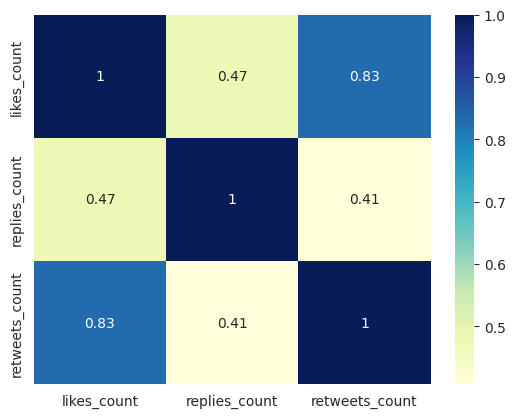

In [ ]:
#Correlation between likes, replies and retweets
corr=df[['likes_count','replies_count','retweets_count']].corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

The above correlation chart shows that it is more likely for a person to retweet a tweet than replying to a tweet if he has liked the tweet

In [ ]:
# Does adding video to a tweet make it more likeable
df[['video','score','likes_count','retweets_count','replies_count']].corr()

,video,score,likes_count,retweets_count,replies_count
video,1.000000,0.016495,0.014354,0.017171,0.014109
score,0.016495,1.000000,0.966924,0.945669,0.488003
likes_count,0.014354,0.966924,1.000000,0.832937,0.472747
retweets_count,0.017171,0.945669,0.832937,1.000000,0.407095
replies_count,0.014109,0.488003,0.472747,0.407095,1.000000


Thus, we can say that adding a video to a tweet will not make very likeable as the correlation between video_count and likes, retweets and replies are very less(1.4%-1.7%). Adding videos would not increase the effectiveness of tweet drastically but will not decrease it as well(since correlation is positive).